In [33]:
# 此文件实现了对Iris数据集的多种分类任务
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn.naive_bayes as bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import numpy as np
import seaborn as sns

In [34]:
def model_test(y_test,y_pred,average="macro"):
  print("Precision:", metrics.precision_score(y_test, y_pred, average=average))
  print("Recall:", metrics.recall_score(y_test, y_pred, average=average))
  print("f1:", metrics.f1_score(y_test, y_pred, average=average))

def plot_mat(y_test,y_pred):
  mat = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
  plt.xlabel('true label')
  plt.ylabel('predicted label')

In [35]:
# 导入数据集
x, y = datasets.load_iris(return_X_y=True)  # 能一次性取前2个
print(x.shape, y.shape)

(150, 4) (150,)


# 朴素贝叶斯

Precision: 0.9533333333333333
Recall: 0.9534480458850206
f1: 0.9533286661999533


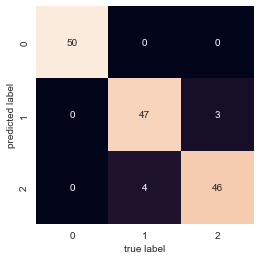

In [36]:
bayes_cls = bayes.GaussianNB()
y_pred = cross_val_predict(bayes_cls,x,y,cv=10)
model_test(y_pred,y)
plot_mat(y_pred,y)

# 逻辑回归

Precision: 0.94
Recall: 0.940109377084167
f1: 0.93999399939994


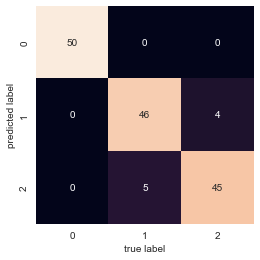

In [37]:
logistic_cls = LogisticRegression(solver='saga',tol=0.1)
y_pred_1 = cross_val_predict(logistic_cls,x,y,cv=10)
model_test(y_pred_1,y)
plot_mat(y_pred_1,y)

# SVM（高斯核）

Precision: 0.9733333333333333
Recall: 0.9733333333333333
f1: 0.9733333333333333


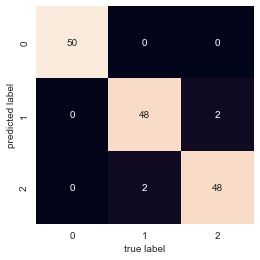

In [38]:
SVC_cls = SVC(kernel="rbf")
y_pred_2 = cross_val_predict(SVC_cls,x,y,cv=10)
model_test(y_pred_2,y)
plot_mat(y_pred_2,y)

# SVM（线性核）

Precision: 0.9733333333333333
Recall: 0.9738247863247862
f1: 0.9733226623982927


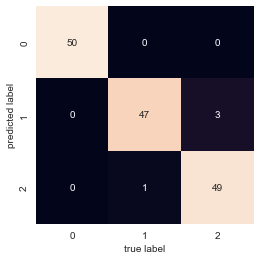

In [39]:
SVC_cls_1 = SVC(kernel="linear")
y_pred_3 = cross_val_predict(SVC_cls_1,x,y,cv=10)
model_test(y_pred_3,y)
plot_mat(y_pred_3,y)

# 决策树

Precision: 0.9533333333333333
Recall: 0.9534480458850206
f1: 0.9533286661999533


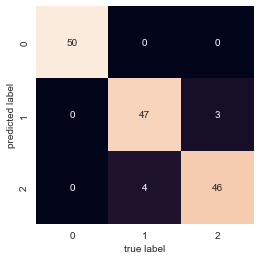

In [40]:
decision_cls = DecisionTreeClassifier()
y_pred_4 = cross_val_predict(decision_cls,x,y,cv=10)
model_test(y_pred_4,y)
plot_mat(y_pred_4,y)

# 随机森林

Precision: 0.96
Recall: 0.96
f1: 0.96


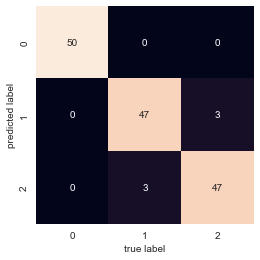

In [41]:
rand_forest_cls = RandomForestClassifier(n_estimators=10)
y_pred_5 = cross_val_predict(rand_forest_cls,x,y,cv=10)
model_test(y_pred_5,y)
plot_mat(y_pred_5,y)